In [1]:
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
from cv2 import *
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
odmodel = load_model('resnet_d1.h5')

In [7]:
def predictor(image_path):
    img_seq = cv2.imread(image_path,cv2.COLOR_BGR2RGB)
    #img_seq = cv2.cvtColor(img_seq, cv2.COLOR_BGR2RGB)
    img_seq = np.asarray(img_seq)
    img_seq = img_seq.reshape((1,224,224,3))
    #datagen.fit(img_seq)
    prediction = odmodel.predict(img_seq)
    prediction = np.asarray(prediction)
    #print(prediction.shape)
    prediction = prediction.reshape((1,224,224))
    image_p = prediction[0]
    plt.imshow(image_p,cmap = 'gray',vmin = 0, vmax = 255)
    #print(prediction.shape)
    
    image = prediction[0]
    img_gtp = image
    image[image<170] = 0
    
    cx_cord = []
    cy_cord = []
    w_cord  = []
    h_cord  = []
    x_cord  = []
    y_cord  = []

    #image = cv2.imread('Images_for_FCRN/Random/img1/img1_1gt.jpg')
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(image, (11, 11), 0)


    thresh = cv2.threshold(blurred, 170, 255, cv2.THRESH_BINARY)[1]

    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=4)

    labels = measure.label(thresh, neighbors=8, background=0)
    mask = np.zeros(thresh.shape, dtype="uint8")

    for label in np.unique(labels):
        if label == 0:
            continue


        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)

        if numPixels > 100:
            mask = cv2.add(mask, labelMask)


    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    if cnts:
        cnts = contours.sort_contours(cnts)[0]
        
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    for (i, c) in enumerate(cnts):
        (x, y, w, h) = cv2.boundingRect(c)
        ((cX, cY), radius) = cv2.minEnclosingCircle(c)
        
        cx_cord.append(cX)
        cy_cord.append(cY)
        h_cord.append(h)
        w_cord.append(w)
        x_cord.append(x)
        y_cord.append(y)
        
        '''RotatedRect box = fitEllipse(c);
        Point2f vtx[4];
        box.points(vtx);
        for( int j = 0; j < 4; j++ )
            line(image, vtx[j], vtx[(j+1)%4], Scalar(0,255,0),2);'''
        
        #rect = cv2.minAreaRect(c)
        rect = cv2.fitEllipse(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(image,[box],0,(255,255,0),1)
            
        #cv2.rectangle(image,(x,y),(x+w,y+h),(255, 0, 255), 3)
        #cv2.circle(image,(int(cX),int(cY)),int(radius/2),(255,0,255),3)
        #cv2.putText(image, "#{}".format(i + 1), (x, y - 15),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 255), 2)
        #print(i)

    #plt.imshow(image,vmin = 0, vmax = 255)
    #cv2.imshow("Image", image)
    #cv2.waitKey(0)
    
    
    #for i in range(len(cx_cord)):
        #cv2.circle(image,(int(cx_cord[i]),int(cy_cord[i])),int(2),(255,0,255),3)
        #cv2.rectangle(image,(x_cord[i],y_cord[i]),(x_cord[i]+w_cord[i],y_cord[i]+h_cord[i]),(255, 0, 255), 1)
        #point = []
        #cv2.rectangle(fitEllipse((cx_cord[i],cy_cord[i])))
    
    plt.imshow(image,vmin = 0, vmax = 255)
    print("Total cars predicted = ", len(cx_cord))
    
    return img_gtp,image_p

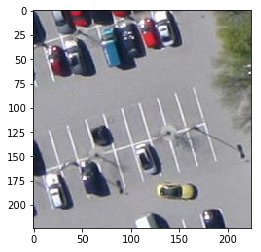

In [8]:
image_print = cv2.imread('Images_for_FCRN/test/Sequential/img7/img7_31o.jpg')
image_print = cv2.cvtColor(image_print, cv2.COLOR_BGR2RGB)
plt.imshow(image_print)

Total cars predicted =  1
--- 0.07639122009277344 seconds ---


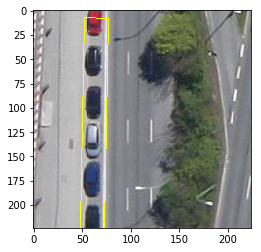

In [14]:
import time
start_time = time.time()
#for i in range(400):
img_gtp,image_p = predictor('Images_for_FCRN/test/Sequential/img1/img1_31o.jpg')
#plt.imshow(img_gtp,cmap = 'gray', vmin = 0, vmax = 255)
print("--- %s seconds ---" % (time.time() - start_time))

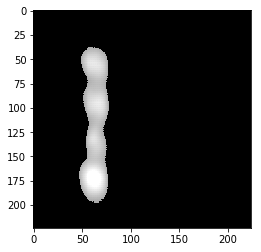

In [15]:
plt.imshow(img_gtp,cmap = 'gray',vmin = 0, vmax = 255)

In [14]:
import matplotlib.image as mpimg

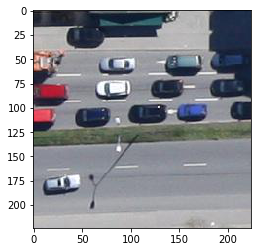

In [96]:
plt.imshow(mpimg.imread('Images_for_FCRN/test/Sequential/img6/img6_40o.jpg'))

In [16]:
from PIL import Image

In [17]:


old_im = Image.open('Images_for_FCRN/Test/1.JPG')
old_size = old_im.size

new_size = (5824,3808)
new_im = Image.new("RGB", new_size)   ## luckily, this is already black!
new_im.paste(old_im, ((int)((new_size[0]-old_size[0])/2),(int)((new_size[1]-old_size[1])/2)))

#new_im.show()
new_im.save('Images_for_FCRN/Test/1b.JPG')